In [16]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_log_error
from sklearn.model_selection import GridSearchCV

In [7]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
y = diabetes['target']

In [8]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [10]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

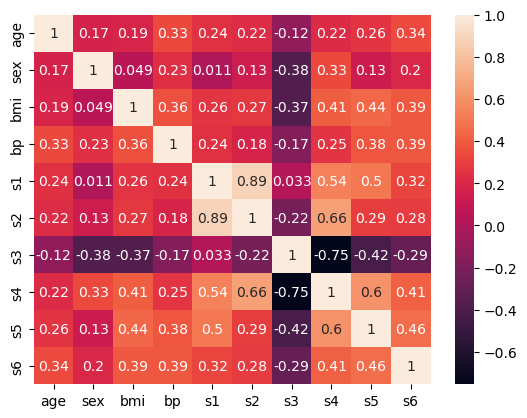

In [43]:
import seaborn as sns
sns.heatmap(X_train.corr(),annot=True);

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

In [45]:
# Instantiate the model and fit
dt_clf= DecisionTreeRegressor().fit(X_train_transformed,y_train)
y_preds = dt_clf.predict(X_test_transformed)


In [46]:
print('R2_score : ',r2_score(y_test,y_preds))
print('MSE : ',mean_squared_error(y_test,y_preds))
print('MAE : ',mean_absolute_error(y_test,y_preds))
print('RMSLE : ',root_mean_squared_log_error(y_test,y_preds))


R2_score :  -0.23048865436500465
MSE :  7565.438202247191
MAE :  68.71910112359551
RMSLE :  0.6590681016746325


In [59]:
param_grid = {
    'max_depth': [i for i in range(1,25)],
    'splitter': ['best','random'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'poisson', 'friedman_mse', 'absolute_error'],
    'max_leaf_nodes': [None, 10, 20, 30, 40],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2]
}

In [62]:
dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(),
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        n_jobs=-1,
                        verbose=True)

In [73]:
import warnings
warnings.filterwarnings('ignore')

# dt_grid.fit(X_train_transformed,y_train)
dt_grid = DecisionTreeRegressor(
    criterion = 'poisson',
     max_depth = 20,
     max_features = None,
     max_leaf_nodes = 30,
     min_impurity_decrease = 0.2,
     min_samples_leaf = 1,
     min_samples_split = 5,
     splitter = 'random'
).fit(X_train_transformed,y_train)

In [74]:
# dt_grid.best_params_

In [75]:
y_preds = dt_grid.predict(X_test_transformed)

In [76]:
print('R2_score : ',r2_score(y_test,y_preds))
print('MSE : ',mean_squared_error(y_test,y_preds))
print('MAE : ',mean_absolute_error(y_test,y_preds))
print('RMSLE : ',root_mean_squared_log_error(y_test,y_preds))

R2_score :  0.2948277916773321
MSE :  4335.6245058272625
MAE :  52.95100790892074
RMSLE :  0.49917072884705593
